In [ ]:
import geopandas as gpd

# Load the boundary shapefile
boundary = gpd.read_file("./Bound_G/SA_Bound_Project_WGS84.shp")

# Get bounding box in lat/lon
minx, miny, maxx, maxy = boundary.total_bounds
print(f"Bounding Box: {minx}, {miny}, {maxx}, {maxy}")

Bounding Box: 72.89202999400004, 8.123329068000032, 78.06237918500005, 21.26613781900005


In [ ]:
import imdlib as imd
import numpy as np

# Define parameters
start_year = 2014
end_year = 2023

var_type = "rain"
file_path = "./IMD_data"

data = imd.get_data(var_type, start_dy, end_dy)
rx5d = data.compute('rx5d', 'A')

ds = rx5d.get_xarray()
print(ds)



# # Empty list to store maximum yearly rainfall values
# yearly_max_rainfall = []

# # Loop through years and extract maximum rainfall
# for year in range(start_year, end_year + 1):
#     print(f"Processing year {year}")

#     # Download data for the year (Grid data for 0.25)
#     ds = imd.get_data(var_type, year)

#     # Crop data to boundary extent
#     ds_subset = ds.crop(lat=(miny, maxy), lon=(minx, maxx))

#     test = ds.
#     print(ds_subset)

Downloading: rain for date 2014-08-08


Exception: Error in file download. 
Data not downloaded for date : 2014-08-08. 
Stopping IMDLIB

<xarray.Dataset> Size: 141kB
Dimensions:  (time: 1, lat: 129, lon: 135)
Coordinates:
  * lat      (lat) float64 1kB 6.5 6.75 7.0 7.25 7.5 ... 37.75 38.0 38.25 38.5
  * lon      (lon) float64 1kB 66.5 66.75 67.0 67.25 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 8B 2014-12-31
Data variables:
    rain     (time, lat, lon) float64 139kB -4.995e+03 -4.995e+03 ... -4.995e+03
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2025-03-13 12:16:27.358302 Python
    references:   
    comment:      
    crs:          epsg:4326


Matplotlib is building the font cache; this may take a moment.


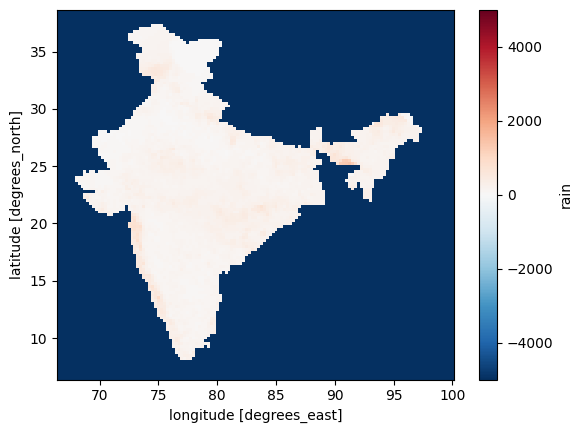

In [ ]:
ds = rx5d.get_xarray()
print(ds)

ds = ds.where(ds['rain'] != -999.) #Remove NaN values
ds['rain'].mean('time').plot()